In [1]:
import geemap
import pandas as pd
import numpy as np
import pdb
from IPython.display import display
import ee
import os

In [61]:
#Load from csv:
ulti_log = pd.read_csv('~F:/Iowa BMP/mosaic_elevation.csv') #mosaic_update3 is largest file without elevation

ulti_log

C:\Users\arj26323\AppData\Local\Temp\ipykernel_14004\2719632032.py:2: DtypeWarning: Columns (5,8,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  ulti_log = pd.read_csv('~F:/Iowa BMP/mosaic_elevation.csv') #mosaic_update3 is largest file without elevation


,index,HUC_12,NRCS_CODE,PRACTICE,Present2_1,CREATOR_NA,Present80s,SHAPE_Area,LAST_EDIT_,Merge,...,imagedate,G,N,Shape_Leng,ORIG_FID,Shape_Area,BUFF_DIST,CID,ndvi,ndwi
0,0,7.080201e+10,332.0,Contour Buffer Strips,1.0,MP,0.0,186501.155605,NaN,NaN,...,20100829,86,160,NaN,NaN,NaN,NaN,NaN,0.367521,-0.300813
1,1,7.080201e+10,332.0,Contour Buffer Strips,1.0,MP,0.0,186501.155605,NaN,NaN,...,20100829,76,127,NaN,NaN,NaN,NaN,NaN,0.322917,-0.251232
2,2,7.080201e+10,332.0,Contour Buffer Strips,1.0,MP,0.0,186501.155605,NaN,NaN,...,20100829,76,127,NaN,NaN,NaN,NaN,NaN,0.322917,-0.251232
3,3,7.080201e+10,332.0,Contour Buffer Strips,1.0,MP,0.0,186501.155605,NaN,NaN,...,20100829,81,135,NaN,NaN,NaN,NaN,NaN,0.310680,-0.250000
4,4,7.080201e+10,332.0,Contour Buffer Strips,1.0,MP,0.0,186501.155605,NaN,NaN,...,20100829,88,148,NaN,NaN,NaN,NaN,NaN,0.333333,-0.254237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899242,4995,NaN,NaN,Farmland,NaN,NaN,NaN,NaN,NaN,NaN,...,20100813,112,134,0.066038,100.0,0.000337,1000.0,0.0,0.229358,-0.089431
899243,4996,NaN,NaN,Farmland,NaN,NaN,NaN,NaN,NaN,NaN,...,20100813,112,134,0.066038,100.0,0.000337,1000.0,0.0,0.229358,-0.089431
899244,4997,NaN,NaN,Farmland,NaN,NaN,NaN,NaN,NaN,NaN,...,20100813,123,149,0.066038,100.0,0.000337,1000.0,0.0,0.201613,-0.095588
899245,4998,NaN,NaN,Farmland,NaN,NaN,NaN,NaN,NaN,NaN,...,20100813,112,130,0.066038,100.0,0.000337,1000.0,0.0,0.176471,-0.074380


In [62]:
# for col in ulti_log.columns:
#     print(col)

def bmp_classify(row):
    if row['PRACTICE'] == 'Farmland':
        return 'Non_BMP'
    return 'BMP'

def grassed_classify(row):
    if row['PRACTICE'] == 'Grassed Waterway':
        return 'Grassed'
    return 'Not_grassed'

ulti_log['BMP status'] = ulti_log.apply(bmp_classify, axis = 1)
ulti_log['Grassed status'] = ulti_log.apply(grassed_classify, axis = 1)

ulti_log

,index,HUC_12,NRCS_CODE,PRACTICE,Present2_1,CREATOR_NA,Present80s,SHAPE_Area,LAST_EDIT_,Merge,...,N,Shape_Leng,ORIG_FID,Shape_Area,BUFF_DIST,CID,ndvi,ndwi,BMP status,Grassed status
0,0,7.080201e+10,332.0,Contour Buffer Strips,1.0,MP,0.0,186501.155605,NaN,NaN,...,160,NaN,NaN,NaN,NaN,NaN,0.367521,-0.300813,BMP,Not_grassed
1,1,7.080201e+10,332.0,Contour Buffer Strips,1.0,MP,0.0,186501.155605,NaN,NaN,...,127,NaN,NaN,NaN,NaN,NaN,0.322917,-0.251232,BMP,Not_grassed
2,2,7.080201e+10,332.0,Contour Buffer Strips,1.0,MP,0.0,186501.155605,NaN,NaN,...,127,NaN,NaN,NaN,NaN,NaN,0.322917,-0.251232,BMP,Not_grassed
3,3,7.080201e+10,332.0,Contour Buffer Strips,1.0,MP,0.0,186501.155605,NaN,NaN,...,135,NaN,NaN,NaN,NaN,NaN,0.310680,-0.250000,BMP,Not_grassed
4,4,7.080201e+10,332.0,Contour Buffer Strips,1.0,MP,0.0,186501.155605,NaN,NaN,...,148,NaN,NaN,NaN,NaN,NaN,0.333333,-0.254237,BMP,Not_grassed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899242,4995,NaN,NaN,Farmland,NaN,NaN,NaN,NaN,NaN,NaN,...,134,0.066038,100.0,0.000337,1000.0,0.0,0.229358,-0.089431,Non_BMP,Not_grassed
899243,4996,NaN,NaN,Farmland,NaN,NaN,NaN,NaN,NaN,NaN,...,134,0.066038,100.0,0.000337,1000.0,0.0,0.229358,-0.089431,Non_BMP,Not_grassed
899244,4997,NaN,NaN,Farmland,NaN,NaN,NaN,NaN,NaN,NaN,...,149,0.066038,100.0,0.000337,1000.0,0.0,0.201613,-0.095588,Non_BMP,Not_grassed
899245,4998,NaN,NaN,Farmland,NaN,NaN,NaN,NaN,NaN,NaN,...,130,0.066038,100.0,0.000337,1000.0,0.0,0.176471,-0.074380,Non_BMP,Not_grassed


In [63]:
# #Add NDVI and NDWI - until you can get addbands functions to work with extraction
# ulti_log['ndvi'] = (ulti_log['N']-ulti_log['R'])/(ulti_log['N']+ulti_log['R'])
# ulti_log['ndwi'] = (ulti_log['G']-ulti_log['N'])/(ulti_log['G']+ulti_log['N']) #not making use of SWIR

#add other indices?

# Get the labeled training data for each band
red_train = ulti_log['R']
blue_train = ulti_log['B'] ##WHY DOES THIS WORK FOR MOSAIC BUT NOT FOR NON MOSAIC
green_train = ulti_log['G']
nir_train = ulti_log['N']
ndwi_train = ulti_log['ndvi']
ndvi_train = ulti_log['ndwi']

elev_train = ulti_log['elevation']

xargs = np.column_stack((blue_train, green_train, red_train, nir_train, ndvi_train, ndwi_train, elev_train)) 
##ORDER OF XARGS MATTERS

## Get the labeled value
yargs = ulti_log['PRACTICE']
# yargs = ulti_log['BMP status'] #Binary - either BMP or not

seed = 3

# Split to training and test data
from sklearn.model_selection import train_test_split
xargs_train, xargs_test, yargs_train, yargs_test = train_test_split(xargs, yargs, test_size=0.2, random_state=seed)

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

'''
##LOOK INTO THIS: 
https://scikit-learn.org/stable/modules/generated/sklearn.
model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold
'''

class_weights = {'Contour Buffer Strips': 0.165, 'Farmland': 0.01, 'Grassed Waterway': 0.165, 'Pond Dam': 0.165, \
                'Stripcropping': 0.165, 'Terrace': 0.165, 'Water and Sediment Control Basin (WASCOB)': 0.165}  #Adjust as needed

#Random forest classification
pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('forest', RandomForestClassifier(n_estimators = 300, min_samples_leaf=10,  class_weight='balanced', \
                                          random_state=seed))
    ]
)

pipe.fit(xargs_train, yargs_train) #Train
y_pred=pipe.predict(xargs_test) #Fit the testing data

In [65]:
#Model results
print(accuracy_score(yargs_test, y_pred))
print(confusion_matrix(yargs_test, y_pred)) 

0.8432360300250209
[[14334   182   275    38    38   272    77]
 [  486 44092  2028   729   278   781   602]
 [ 1420  3781 61602  1305   646  4459  1550]
 [   67   312   412  2060    34   186    91]
 [   16    29    41     3  3831     3     0]
 [  516  1137  2162   705   140 19924  1216]
 [  181   400   644   225    39   688  5813]]


In [66]:
#Recall, precision, and F1 scores
from sklearn.metrics import classification_report
print(classification_report(yargs_test, y_pred))

                                           precision    recall  f1-score   support

                    Contour Buffer Strips       0.84      0.94      0.89     15216
                                 Farmland       0.88      0.90      0.89     48996
                         Grassed Waterway       0.92      0.82      0.87     74763
                                 Pond Dam       0.41      0.65      0.50      3162
                            Stripcropping       0.77      0.98      0.86      3923
                                  Terrace       0.76      0.77      0.76     25800
Water and Sediment Control Basin (WASCOB)       0.62      0.73      0.67      7990

                                 accuracy                           0.84    179850
                                macro avg       0.74      0.83      0.78    179850
                             weighted avg       0.85      0.84      0.85    179850



In [67]:
##How is this different for classifier (no mse)
## Mean baseline
# print('MEAN BASELINE:')
# y_pred_mean = [np.mean(yargs_train)] * len(yargs_test)
# print('Mean Absolute Error:', metrics.mean_absolute_error(yargs_test, y_pred_mean))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yargs_test, y_pred_mean)))

##5-fold cross validation
# predictors = xargs_train
# targets = yargs_train 

# from sklearn.model_selection import KFold, cross_validate

# X, y = predictors, targets
# n_splits = 5
# kf = KFold(n_splits=n_splits, shuffle=True)

# model = pipe
# scoring=('r2', 'neg_root_mean_squared_error')

# cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring, return_train_score=False)

# x = pd.DataFrame(cv_results)

# print('r squared is: ' + str(x['test_r2'].mean()))
# print('Average RMSE (5 fold) is: '+ str(-x['test_neg_root_mean_squared_error'].mean()))
# print('NRSME is: ' + str(-x['test_neg_root_mean_squared_error'].mean()/np.ptp(yargs_test)))

# pipe.steps[1][1].feature_importances_

In [68]:
sum(confusion_matrix(yargs_test, y_pred)) #why are these numbers so #172231 total

array([17020, 49933, 67164,  5065,  5006, 26313,  9349], dtype=int64)

In [69]:
yargs_test

822506                                     Farmland
357026                             Grassed Waterway
238502                             Grassed Waterway
334301                             Grassed Waterway
616380    Water and Sediment Control Basin (WASCOB)
                            ...                    
723950                                     Farmland
435911                             Grassed Waterway
781799                                     Farmland
731243                                     Farmland
432177                             Grassed Waterway
Name: PRACTICE, Length: 179850, dtype: object

In [70]:
df = ulti_log.groupby('PRACTICE')['imagedate'].count() #'index' not present in farmland extraction

df #i have concerns stripcropping is not getting data from enough locations - also pond dam seems low? see gis file

PRACTICE
Contour Buffer Strips                         75000
Farmland                                     245000
Grassed Waterway                             374161
Pond Dam                                      15909
Stripcropping                                 20000
Terrace                                      129100
Water and Sediment Control Basin (WASCOB)     40077
Name: imagedate, dtype: int64

In [71]:
#Export df to csv, to save time

import os

out_dir = os.path.expanduser('~F:/Iowa BMP/')
out_csv = os.path.join(out_dir, 'mosaic_bands.csv')
# ulti_log.to_csv(out_csv, index = False)

bands: 7
height: 326
width: 332
crs: EPSG:26915


<closed DatasetReader name='F:/Iowa BMP/Geotiffs/IA/Tests/ia_im.tif' mode='r'>

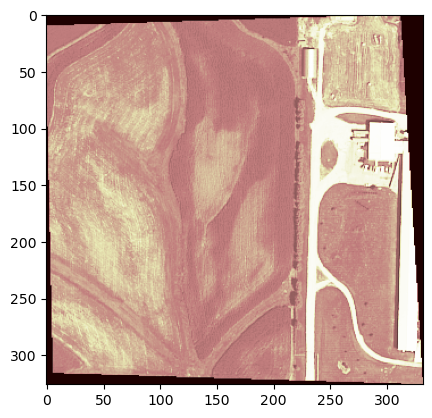

In [72]:
#Rasterio load geotiffs

import rasterio
import gdal

im = rasterio.open("F:/Iowa BMP/Geotiffs/IA/Tests/ia_im.tif")

print('bands: ' + str(im.count))
print('height: ' + str(im.height))
print('width: ' + str(im.width))
print('crs: ' + str(im.crs))

from matplotlib import pyplot as plt
from rasterio.plot import show

plt.imshow(im.read(1), cmap='pink')
# show(im)

input_tiff_path = "F:/Iowa BMP/Geotiffs/IA/Tests/ia_im.tif"
with rasterio.open(input_tiff_path) as src:
    red_band = src.read(1)
    green_band = src.read(2)
    blue_band = src.read(3)
    nir_band = src.read(4)
    
    ndvi_band = src.read(5)
    
    ndwi_band = src.read(6)
    
    elev_band = src.read(7) ##NOTE POSITION OF BANDs

    
# im.descriptions = tuple(['Blue', 'Green', 'Red', 'NIR','NDVWI','NDVI','ELEVATION']) - is this order correct?

src

In [73]:
'''
im band designations (NEED TO BE IN THIS ORDER, how the model was trained. CHECK FOR EVERY IMAGE): 
1: blue
2: green
3: red
4: nir
5: ndvi (added)
6: nd2i (added)
7: elevation (added)
'''

im_whole = np.column_stack( ##DOUBLE CHECK BAND ORDER
    (
        im.read(3).ravel(), ##Blue
        im.read(2).ravel(), ##Green
        im.read(1).ravel(), ##Red
        im.read(4).ravel(), ##NIR
        im.read(5).ravel(), ##NDVI
        im.read(6).ravel(), ##NDWI
        im.read(7).ravel()  ##ELEVATION
                           )
) 

classified_labels = pipe.predict(im_whole)
classified_labels_reshaped = classified_labels.reshape(im.read(1).shape)

class_mapping = {
    'Terrace': 1,
    'Contour Buffer Strips': 2, 
    'Farmland': 3,
    'Grassed Waterway': 4, 
    'Pond Dam': 5, 
    'Stripcropping': 6,
    'Water and Sediment Control Basin (WASCOB)': 7
}

classified_labels_numeric = np.vectorize(class_mapping.get)(classified_labels_reshaped)

In [74]:
classified_labels_reshaped

array([['Contour Buffer Strips', 'Contour Buffer Strips',
        'Contour Buffer Strips', ..., 'Contour Buffer Strips',
        'Contour Buffer Strips', 'Contour Buffer Strips'],
       ['Contour Buffer Strips', 'Contour Buffer Strips',
        'Contour Buffer Strips', ..., 'Contour Buffer Strips',
        'Contour Buffer Strips', 'Contour Buffer Strips'],
       ['Contour Buffer Strips', 'Contour Buffer Strips',
        'Contour Buffer Strips', ..., 'Contour Buffer Strips',
        'Contour Buffer Strips', 'Contour Buffer Strips'],
       ...,
       ['Contour Buffer Strips', 'Contour Buffer Strips',
        'Contour Buffer Strips', ..., 'Terrace', 'Terrace', 'Terrace'],
       ['Contour Buffer Strips', 'Contour Buffer Strips',
        'Contour Buffer Strips', ..., 'Terrace', 'Terrace', 'Terrace'],
       ['Contour Buffer Strips', 'Contour Buffer Strips',
        'Contour Buffer Strips', ..., 'Terrace', 'Terrace', 'Terrace']],
      dtype=object)

In [75]:
classified_labels_numeric

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1]])

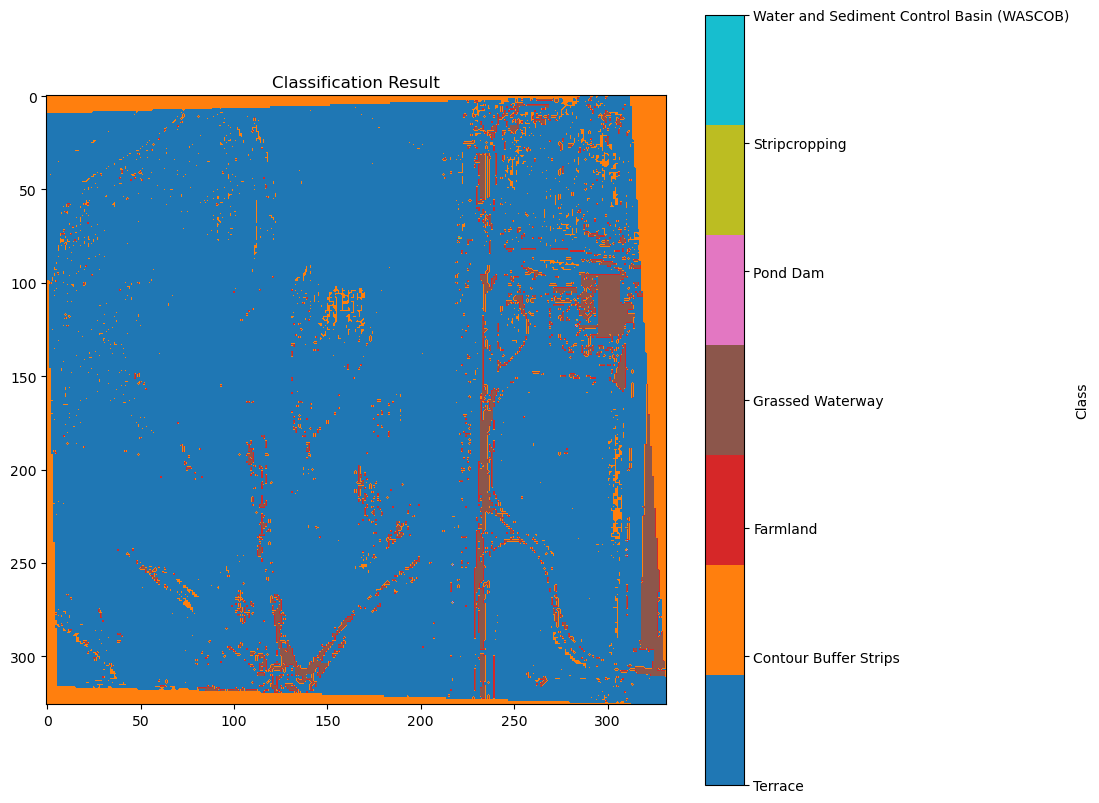

In [76]:
# Plot using tab10 colormap for discrete colors
tab10_custom = plt.get_cmap('tab10', 7)

# Plot using the custom colormap
plt.figure(figsize=(10, 10))
plt.imshow(classified_labels_numeric, cmap=tab10_custom, vmin=1, vmax=7)  # Specify vmin and vmax to ensure correct mapping
cbar = plt.colorbar(ticks=range(1, 8), label='Class')  # Specify ticks for discrete classes
cbar.ax.set_yticklabels(class_mapping.keys())  # Set custom tick labels for the colorbar
plt.title('Classification Result')
plt.show()

In [60]:
# #Hyperparameter tuning - might take a while!

# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'forest__n_estimators':[100, 200, 300],
#     'forest__max_depth':[None, 10, 20]
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(xargs_train, yargs_train)

# # Get the best parameters and the best estimator
# best_params = grid_search.best_params_
# best_estimator = grid_search.best_estimator_

# # Print the best parameters
# print("Best Parameters:", best_params)

# # Predict on the test set using the best estimator
# y_pred = best_estimator.predict(xargs_test)

# # Evaluate the model
# print("Accuracy:", accuracy_score(yargs_test, y_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(yargs_test, y_pred))

KeyboardInterrupt: 

In [ ]:
#Georgia NAIP example

'''
NAIP 4-band image band designations (downloaded from USGS EarthExplorer):

Band 1: red
Band 2: green
Band 3: blue
Band 4: nir

'''

xx = rasterio.open("F:/Iowa BMP/Geotiffs/GA/Tests/m_3108101_se_17_060_20220130.tif")

print('bands: ' + str(xx.count))
print('height: ' + str(xx.height))
print('width: ' + str(xx.width))
print('crs: ' + str(xx.crs))



In [18]:
##Add NDVI and NDWI
# Open the existing GeoTIFF file in read mode
with rasterio.open("F:/Iowa BMP/Geotiffs/GA/Tests/m_3108101_se_17_060_20220130.tif") as src:
    # Read the red and near-infrared bands
    red_band = src.read(1)  
    green_band = src.read(2)  
    blue_band = src.read(3)  
    nir_band = src.read(4)  

    # Calculate NDVI -- SOME INF VALUES, BELOW IS HOW TO DEAL WITH THEM?
    ndvi = np.where((nir_band + red_band) == 0, 0, (nir_band - red_band) / (nir_band + red_band))
    ndwi = np.where((green_band + nir_band) == 0, 0, (green_band - nir_band) / (green_band + nir_band))

    # Get metadata from the source file
    kwargs = src.meta

    # Update metadata for the new band
    kwargs.update(
        count=len(src.indexes) + 2,  # Increment band count
        dtype=rasterio.float32  # Specify data type (float32 for NDVI and NDWI)
    )

    # Open a new GeoTIFF file in write mode
    with rasterio.open("F:/Iowa BMP/Geotiffs/GA/Tests/m_3108101_se_17_060_20220130_with_ndvi7.tif", "w", **kwargs) as dst:
        # Write the existing bands to the new file
        for i in range(1, len(src.indexes) + 1):
            dst.write(src.read(i), i)

        # Write the NDVI band to the new file
        dst.write(ndvi.astype(rasterio.float32), len(src.indexes) + 1)

C:\Users\arj26323\AppData\Local\Temp\ipykernel_9916\3864402134.py:11: RuntimeWarning: divide by zero encountered in divide
  ndvi = np.where((nir_band + red_band) == 0, 0, (nir_band - red_band) / (nir_band + red_band))
C:\Users\arj26323\AppData\Local\Temp\ipykernel_9916\3864402134.py:11: RuntimeWarning: invalid value encountered in divide
  ndvi = np.where((nir_band + red_band) == 0, 0, (nir_band - red_band) / (nir_band + red_band))
C:\Users\arj26323\AppData\Local\Temp\ipykernel_9916\3864402134.py:12: RuntimeWarning: divide by zero encountered in divide
  ndwi = np.where((green_band + nir_band) == 0, 0, (green_band - nir_band) / (green_band + nir_band))
C:\Users\arj26323\AppData\Local\Temp\ipykernel_9916\3864402134.py:12: RuntimeWarning: invalid value encountered in divide
  ndwi = np.where((green_band + nir_band) == 0, 0, (green_band - nir_band) / (green_band + nir_band))


In [19]:
##Divide by zero errors
print('bands: ' + str(dst.count))
print('height: ' + str(dst.height))
print('width: ' + str(dst.width))
print('crs: ' + str(dst.crs))

im2 = rasterio.open("F:/Iowa BMP/Geotiffs/GA/Tests/m_3108101_se_17_060_20220130_with_ndvi7.tif", "r")

dst_whole = np.column_stack((im2.read(3).ravel(), im2.read(2).ravel(), im2.read(1).ravel(), im2.read(4).ravel(), \
                           im2.read(5).ravel(), im2.read(6).ravel())) ##NOTE BAND DIFFERENCES

classified_dst = pipe.predict(dst_whole)
classified_dst_reshaped = classified_dst.reshape(im2.read(1).shape)

class_mapping = {
    'Terrace': 1,
    'Contour Buffer Strips': 2, 
    'Farmland': 3,
    'Grassed Waterway': 4, 
    'Pond Dam': 5, 
    'Stripcropping': 6,
    'Water and Sediment Control Basin (WASCOB)': 7
}

classified_dst_numeric = np.vectorize(class_mapping.get)(classified_dst_reshaped)

bands: 6
height: 12290
width: 10620
crs: EPSG:26917


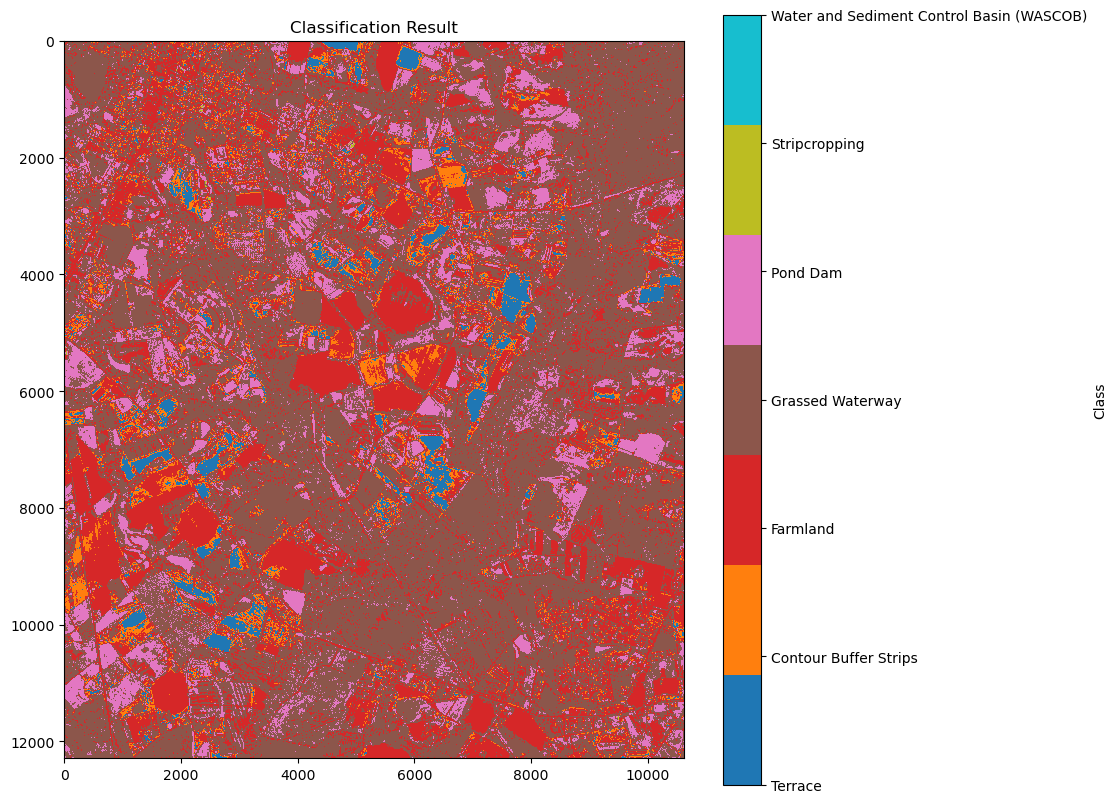

In [20]:
# Plot using tab10 colormap for discrete colors
tab10_custom = plt.get_cmap('tab10', 7)

# Plot using the custom colormap
plt.figure(figsize=(10, 10))
plt.imshow(classified_dst_numeric, cmap=tab10_custom, vmin=1, vmax=7)  # Specify vmin and vmax to ensure correct mapping
cbar = plt.colorbar(ticks=range(1, 8), label='Class')  # Specify ticks for discrete classes
cbar.ax.set_yticklabels(class_mapping.keys())  # Set custom tick labels for the colorbar
plt.title('Classification Result')
plt.show()

In [ ]:
'''
Ideas to improve BMP classification:

Weighted Loss Function: Adjust the loss function to penalize misclassifications of the minority class more heavily, 
effectively giving it more importance during training.

Adjusting Class Weights: In some machine learning algorithms (such as Random Forest), 
you can specify class weights to give more importance to minority classes during training.

A possible approach could be to allocate a larger proportion of the training dataset to BMPs while still 
including enough samples of general farmland to maintain the overall class distribution. Experiment with different 
ratios and evaluate the model performance using appropriate metrics such as precision, recall, and F1-score to find the
optimal balance between class representation and classification accuracy for your specific use case. 
Cross-validation techniques can also help assess the robustness of your model across different subsets of the data.

How to detect BMPs as opposed to just row crops, fields, etc.?
'''